In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
# No header
# Columns are x,y,sigma,last
df = pd.read_csv("data.txt", header=None, names=["x", "y", "sigma", "last"])
df

,x,y,sigma,last
0,84,-8,8,0
1,11,38,4,0
2,37,19,4,0
3,13,33,6,0
4,40,28,7,0
...,...,...,...,...
1357,58,402,6,0
1358,35,228,3,0
1359,19,190,6,0
1360,78,606,4,0


In [4]:
# Get row indices where last == 1
last_indices = df.index[df["last"] == 1].tolist()

# Increment indices by 1 so the last row of each event is included
last_indices = [i + 1 for i in last_indices]

# Add 0 to the beginning of the list
last_indices.insert(0, 0)

# Slice df into events
events = [df.iloc[last_indices[i]:last_indices[i + 1]] for i in range(len(last_indices) - 1)]

# Print number of observations in each event
for i, event in enumerate(events):
    print(f"Event {i}: {len(event)} observations")

Event 0: 100 observations
Event 1: 94 observations
Event 2: 242 observations
Event 3: 242 observations
Event 4: 242 observations
Event 5: 442 observations


In [ ]:
for i, event in enumerate(events):
    n = len(event)
    
    S = (1 / (event["sigma"] * event["sigma"])).sum()
    Sx = (event["x"] / (event["sigma"] * event["sigma"])).sum()
    Sy = (event["y"] / (event["sigma"] * event["sigma"])).sum()
    
    t = (1 / event["sigma"])
    # t = (1 / event["sigma"]) * (event["x"] - (Sx / S))
    Stt = (t * t).sum()
    
    print(f"Event {i}:")
    print(f"  n: {n}")
    print(f"  S: {S}")
    print(f"  Sx: {Sx}")
    print(f"  Sy: {Sy}")
    print(f"  Stt: {Stt}")
    
    
    print()

Event 0:
  n: 100
  S: 18.950655706727137
  Sx: 990.3300825144873
  Sy: 260.2829098954397
  Stt: 19130.780665730083

Event 1:
  n: 94
  S: 19.407040028974553
  Sx: 950.7853313177122
  Sy: -846.6072182854624
  Stt: 12913.203160244733

Event 2:
  n: 242
  S: 9.576458739859916
  Sx: 502.3152163330909
  Sy: 1123.1993930448552
  Stt: 9319.323469008541

Event 3:
  n: 242
  S: 45.08333333333334
  Sx: 2180.5277777777774
  Sy: -2763.25
  Stt: 40517.46861093996

Event 4:
  n: 242
  S: 0.3454238228837738
  Sx: 16.365843795854072
  Sy: 184.53759518636895
  Stt: 294.66840347336546

Event 5:
  n: 442
  S: 27.937222222222225
  Sx: 1348.5247562358277
  Sy: 9665.298117913833
  Stt: 22181.379302551213



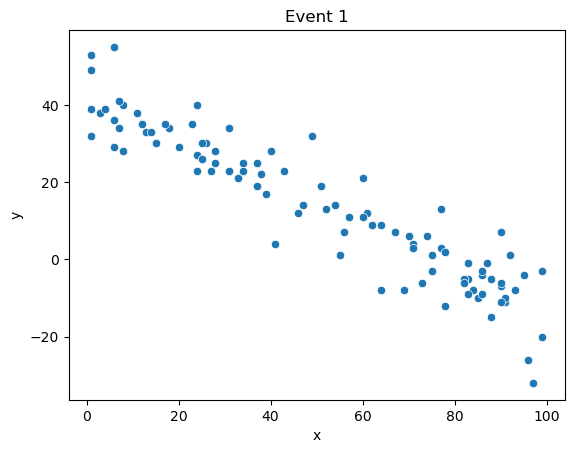

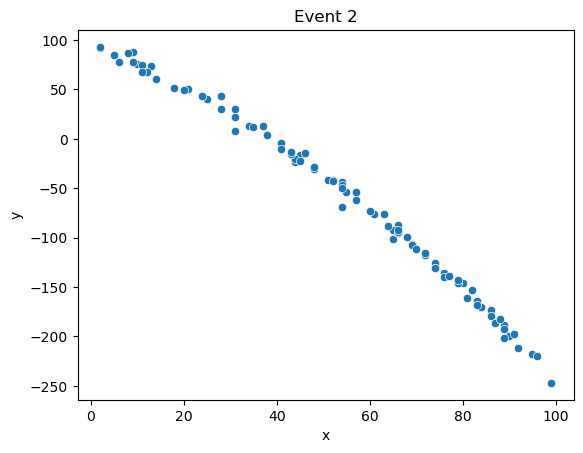

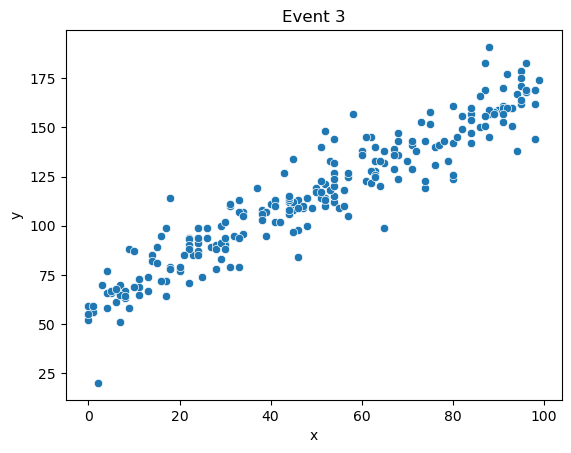

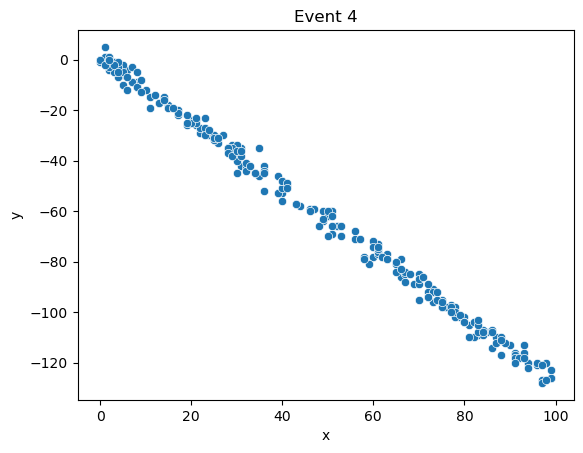

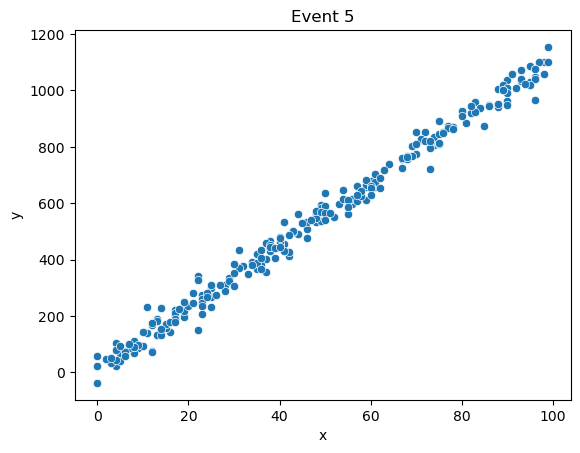

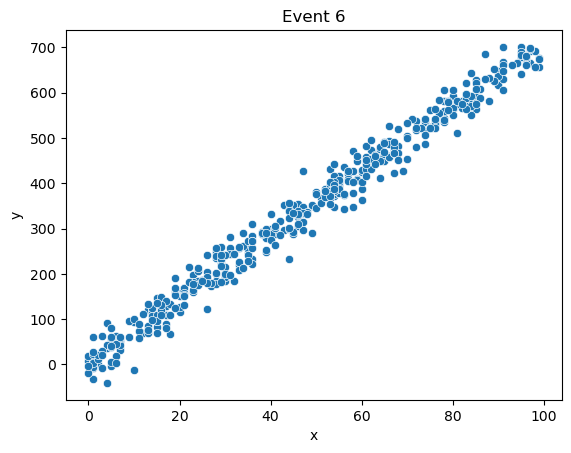

In [6]:
for i, event in enumerate(events):
    sns.scatterplot(data=event, x="x", y="y")
    plt.title("Event " + str(i + 1))
    plt.show()